In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
csv_data = """location,connected_location,distance,x,y
MAIN GATE,TP1,100,600,580
TP1,MAIN GATE,35,600,535
TP1,LIB,110,600,535
TP1,TP2,25,600,535
LIB,TP1,110,490,535
LIB,BS CANTEEN,56,490,535
TP2,TP1,25,600,510
TP2,BS CANTEEN,60,600,510
TP2,TP3,34,600,510
BS CANTEEN,TP2,60,540,510
BS CANTEEN,LIB,56,540,510
BS CANTEEN,FBS,52,540,510
TP3,TP2,34,600,476
TP3,FBS,100,600,476
TP3,TP4,59,600,476
FBS,TP3,100,500,476
FBS,BS CANTEEN,52,500,476
TP4,TP3,59,600,417
TP4,CP1,40,600,417
TP4,TP5,49,600,417
CP1,TP4,40,640,432
CP1,TP22,34,640,432
TP5,TP4,49,600,368
TP5,TP6,107,600,368
TP5,FAS CANTEEN,108,600,368
TP6,TP5,107,493,368
TP6,CP2,93,493,368
TP6,CL,93,493,368
CP2,TP6,93,400,368
CP2,TP7,193,400,368
CL,TP6,93,493,275
CL,LH,115,493,275
LH,CL,115,493,160
LH,TP23,107,493,160
TP7,CP2,193,300,368
TP7,MC,62,300,368
TP7,TP8,60,300,368
MC,TP7,62,300,430
TP8,TP7,60,240,368
TP8,TCH,58,240,368
TP8,TP9,145,240,368
TCH,TP8,58,240,310
TP9,TP8,145,95,368
TP9,FOT,258,95,368
FOT,TP9,258,95,110
FOT,TP10,188,95,110
TP10,FOT,188,283,110
TP10,EL,40,283,110
TP10,TP11,210,283,110
EL,TP10,40,283,70
TP11,TP10,210,493,110
TP11,LH4,30,493,110
TP11,TP12,107,493,110
LH4,TP11,30,493,80
TP12,TP11,107,600,110
TP12,TP13,20,600,110
TP13,TP12,20,600,130
TP13,TP23,30,600,130
TP13,SLH,100,600,130
TP13,TP14,110,600,130
SLH,TP13,100,700,85
TP14,TP13,110,710,130
TP14,CP3,35,710,130
TP14,CP5,90,710,130
CP3,TP14,35,710,165
CP5,TP14,90,800,130
TP15,CP5,52,852,130
TP15,FAS,18,852,130
TP15,TP16,50,852,130
FAS,TP15,50,870,130
TP16,TP15,50,852,80
TP16,FCH,18,852,80
FCH,TP16,18,870,80
FCH,TP17,101,870,80
TP17,FCH,101,971,80
TP17,TP18,154,971,80
TP18,TP17,154,971,234
TP18,CP4,61,971,234
CP4,TP18,61,910,234
CP4,TP19,113,910,234
TP19,CP4,113,858,234
TP19,TP20,86,858,234
TP20,TP19,86,858,320
TP20,ITC,62,858,320
TP20,TP21,200,858,320
ITC,TP20,62,920,320
TP21,TP20,200,858,520
TP21,AMMACHCHI,72,858,520
TP21,FBS MB,58,858,520
AMMACHCHI,TP21,72,930,550
AMMACHCHI,Gate2,10,930,550
Gate2,AMMACHCHI,10,950,560
FBS MB,TP21,58,800,497
FBS MB,TP22,126,800,497
TP22,FBS MB,126,674,447
TP22,CP1,34,674,447
TP22,DOE,32,674,447
DOE,TP22,32,674,415
TP23,FAS CANTEEN,100,600,160
TP23,LH,107,600,160
FAS CANTEEN,TP5,108,600,260
FAS CANTEEN,TP23,100,600,260
"""

In [3]:
df = pd.read_csv(io.StringIO(csv_data))


In [4]:
df.head()

,location,connected_location,distance,x,y
0,MAIN GATE,TP1,100,600,580
1,TP1,MAIN GATE,35,600,535
2,TP1,LIB,110,600,535
3,TP1,TP2,25,600,535
4,LIB,TP1,110,490,535


 Generate synthetic travel times

In [5]:
np.random.seed(42)  # For reproducibility
df['time_of_day'] = np.random.choice(['morning', 'afternoon', 'evening'], size=len(df))
df['day_of_week'] = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], size=len(df))
df['event'] = np.random.choice([0, 1], size=len(df))
df['travel_time'] = df['distance'] / 10 + np.random.normal(0, 2, size=len(df))  # Adding some noise to travel time
# df.drop(columns=['travel_time','congestion_level'], inplace=True)
df.head()

,location,connected_location,distance,x,y,time_of_day,day_of_week,event,travel_time
0,MAIN GATE,TP1,100,600,580,evening,Wednesday,1,10.586145
1,TP1,MAIN GATE,35,600,535,morning,Monday,1,2.071297
2,TP1,LIB,110,600,535,evening,Wednesday,1,14.731549
3,TP1,TP2,25,600,535,evening,Wednesday,1,3.447666
4,LIB,TP1,110,490,535,morning,Monday,1,8.617393


In [6]:
# df.to_csv('/modified_data.csv', index=False)

In [7]:
df.head()

,location,connected_location,distance,x,y,time_of_day,day_of_week,event,travel_time
0,MAIN GATE,TP1,100,600,580,evening,Wednesday,1,10.586145
1,TP1,MAIN GATE,35,600,535,morning,Monday,1,2.071297
2,TP1,LIB,110,600,535,evening,Wednesday,1,14.731549
3,TP1,TP2,25,600,535,evening,Wednesday,1,3.447666
4,LIB,TP1,110,490,535,morning,Monday,1,8.617393


Step 02

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [9]:
# Define the features and target
features = ['location', 'connected_location', 'time_of_day', 'day_of_week', 'event']
target = 'travel_time'

In [10]:
# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['location', 'connected_location', 'time_of_day', 'day_of_week']),
        ('num', StandardScaler(), ['event'])
    ])

In [11]:
# Preprocess the data
X = df[features]
y = df[target]
X_preprocessed = preprocessor.fit_transform(X)

Model Training

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [14]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [15]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.418143733562338


Integration

In [18]:
import networkx as nx

In [19]:
# Create a graph from the original CSV data
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['location'], row['connected_location'], weight=row['distance'])

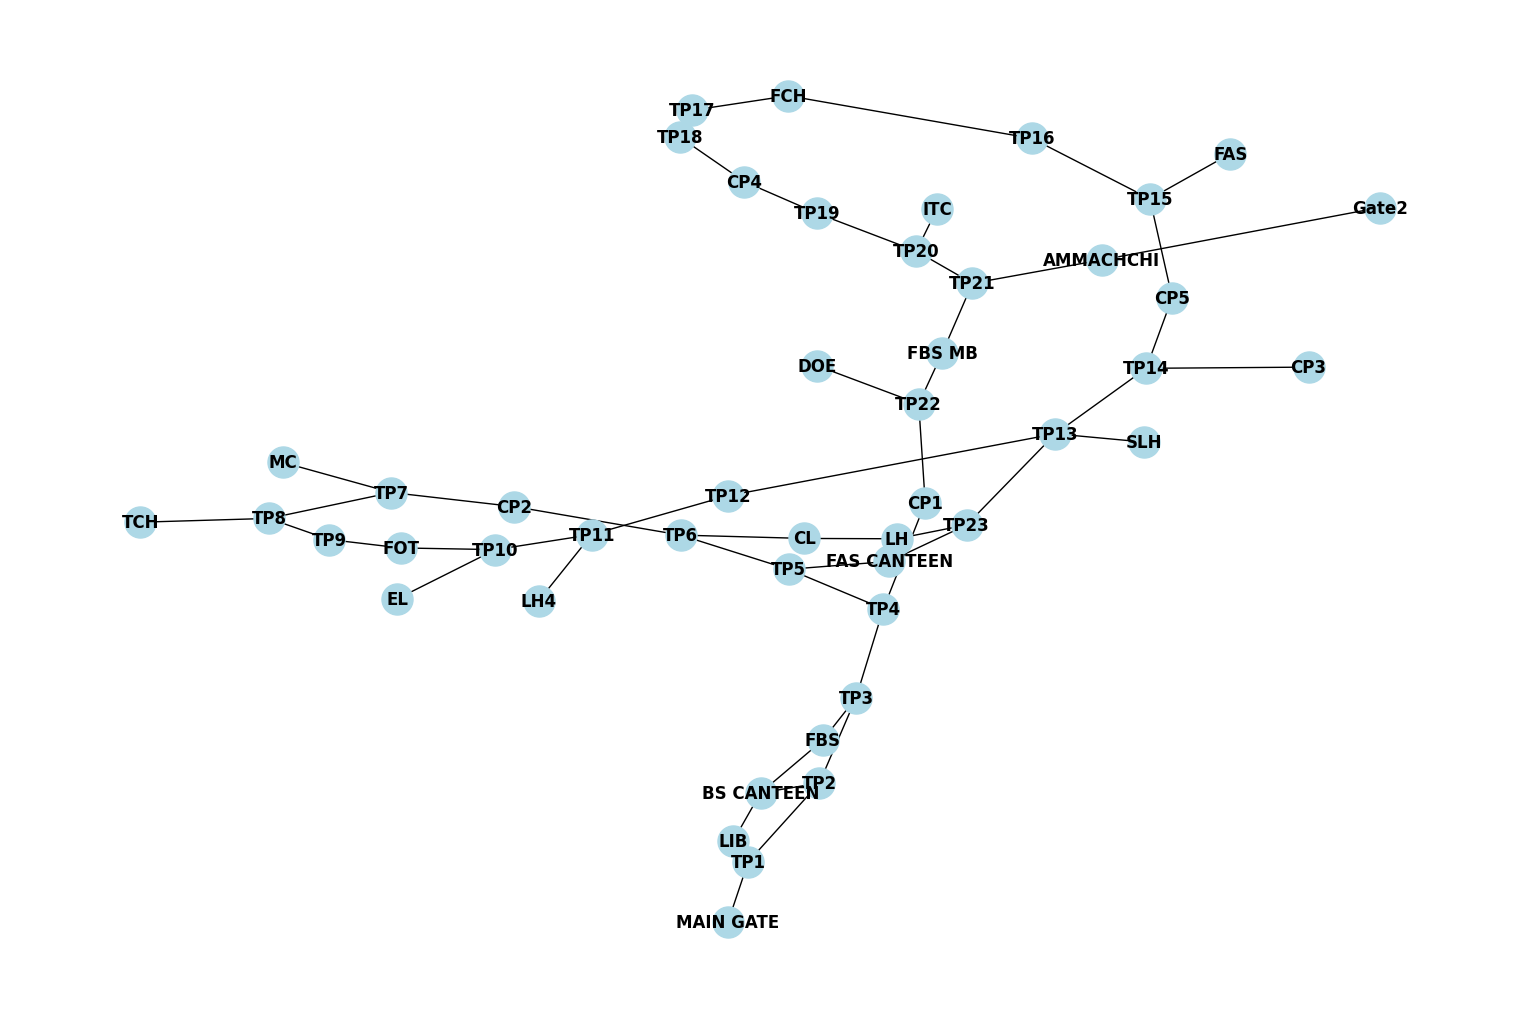

In [20]:

import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(15, 10))

# Draw the graph with increased scale
nx.draw(G, with_labels=True, font_weight='bold', node_size=500, node_color='lightblue')

# Show the plot
plt.show()


In [21]:
# Predict travel time for each edge based on current conditions
def predict_travel_time(start, end, time_of_day, day_of_week, event):
    input_data = pd.DataFrame([[start, end, time_of_day, day_of_week, event]],
                              columns=features)
    input_preprocessed = preprocessor.transform(input_data)
    predicted_time = model.predict(input_preprocessed)
    return predicted_time[0]


In [22]:
# Update the graph with predicted travel times
def update_graph_with_predictions(G, time_of_day, day_of_week, event):
    for u, v, data in G.edges(data=True):
        predicted_time = predict_travel_time(u, v, time_of_day, day_of_week, event)
        # G[u][v]['weight'] = predicted_time
        data['weight'] = predicted_time

In [24]:
# Example usage
update_graph_with_predictions(G, 'evening', 'Wednesday', 1)

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, 'MAIN GATE', 'TP12')
print('Shortest path:', shortest_path)



Shortest path: ['MAIN GATE', 'TP1', 'TP2', 'TP3', 'TP4', 'TP5', 'FAS CANTEEN', 'TP23', 'TP13', 'TP12']
